In [4]:
## Classification of Plastic Waste

!pip install matpl

In [6]:
#necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [1]:
#import the data
train_path = "DATASET/TRAIN"
test_path = "DATASET/TEST"


In [2]:
#IMporting Libaries
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization # Changed conv2D to Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [15]:
#visualization
from cv2 import cvtColor
x_data = []
y_data = []
for category in glob(train_path+'/*'):
  for file in tqdm(glob(category+'/*')):
    img_array = cv2.imread(file)
    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    x_data.append(img_array)
    y_data.append(category.split('/')[-1])
  data = pd.DataFrame({'img':x_data, 'label':y_data})

100%|██████████| 9999/9999 [00:50<00:00, 198.56it/s] 


In [16]:
data.shape

(22564, 2)

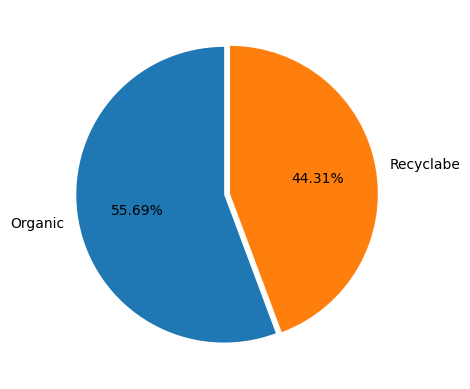

In [17]:
#ploting
colors = ['#a0d157', '#c48bb8']
plt.pie (data.label.value_counts(), labels=['Organic','Recyclabe'],autopct='%0.2f%%',startangle=90, explode=[0.02,0.02])
plt.show()

In [18]:
print(data.columns)

Index(['img', 'label'], dtype='object')


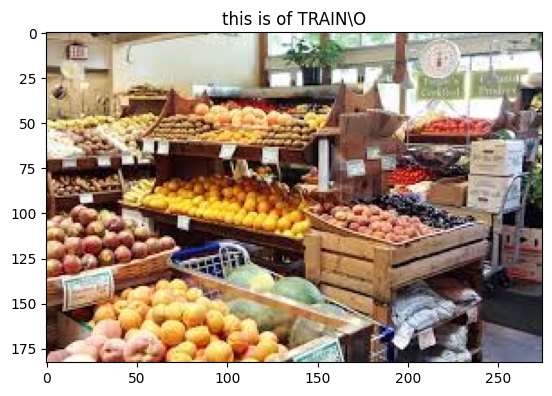

In [22]:
plt.title('this is of {0}'.format(data.label[Index]))
plt.imshow(data['img'][Index])

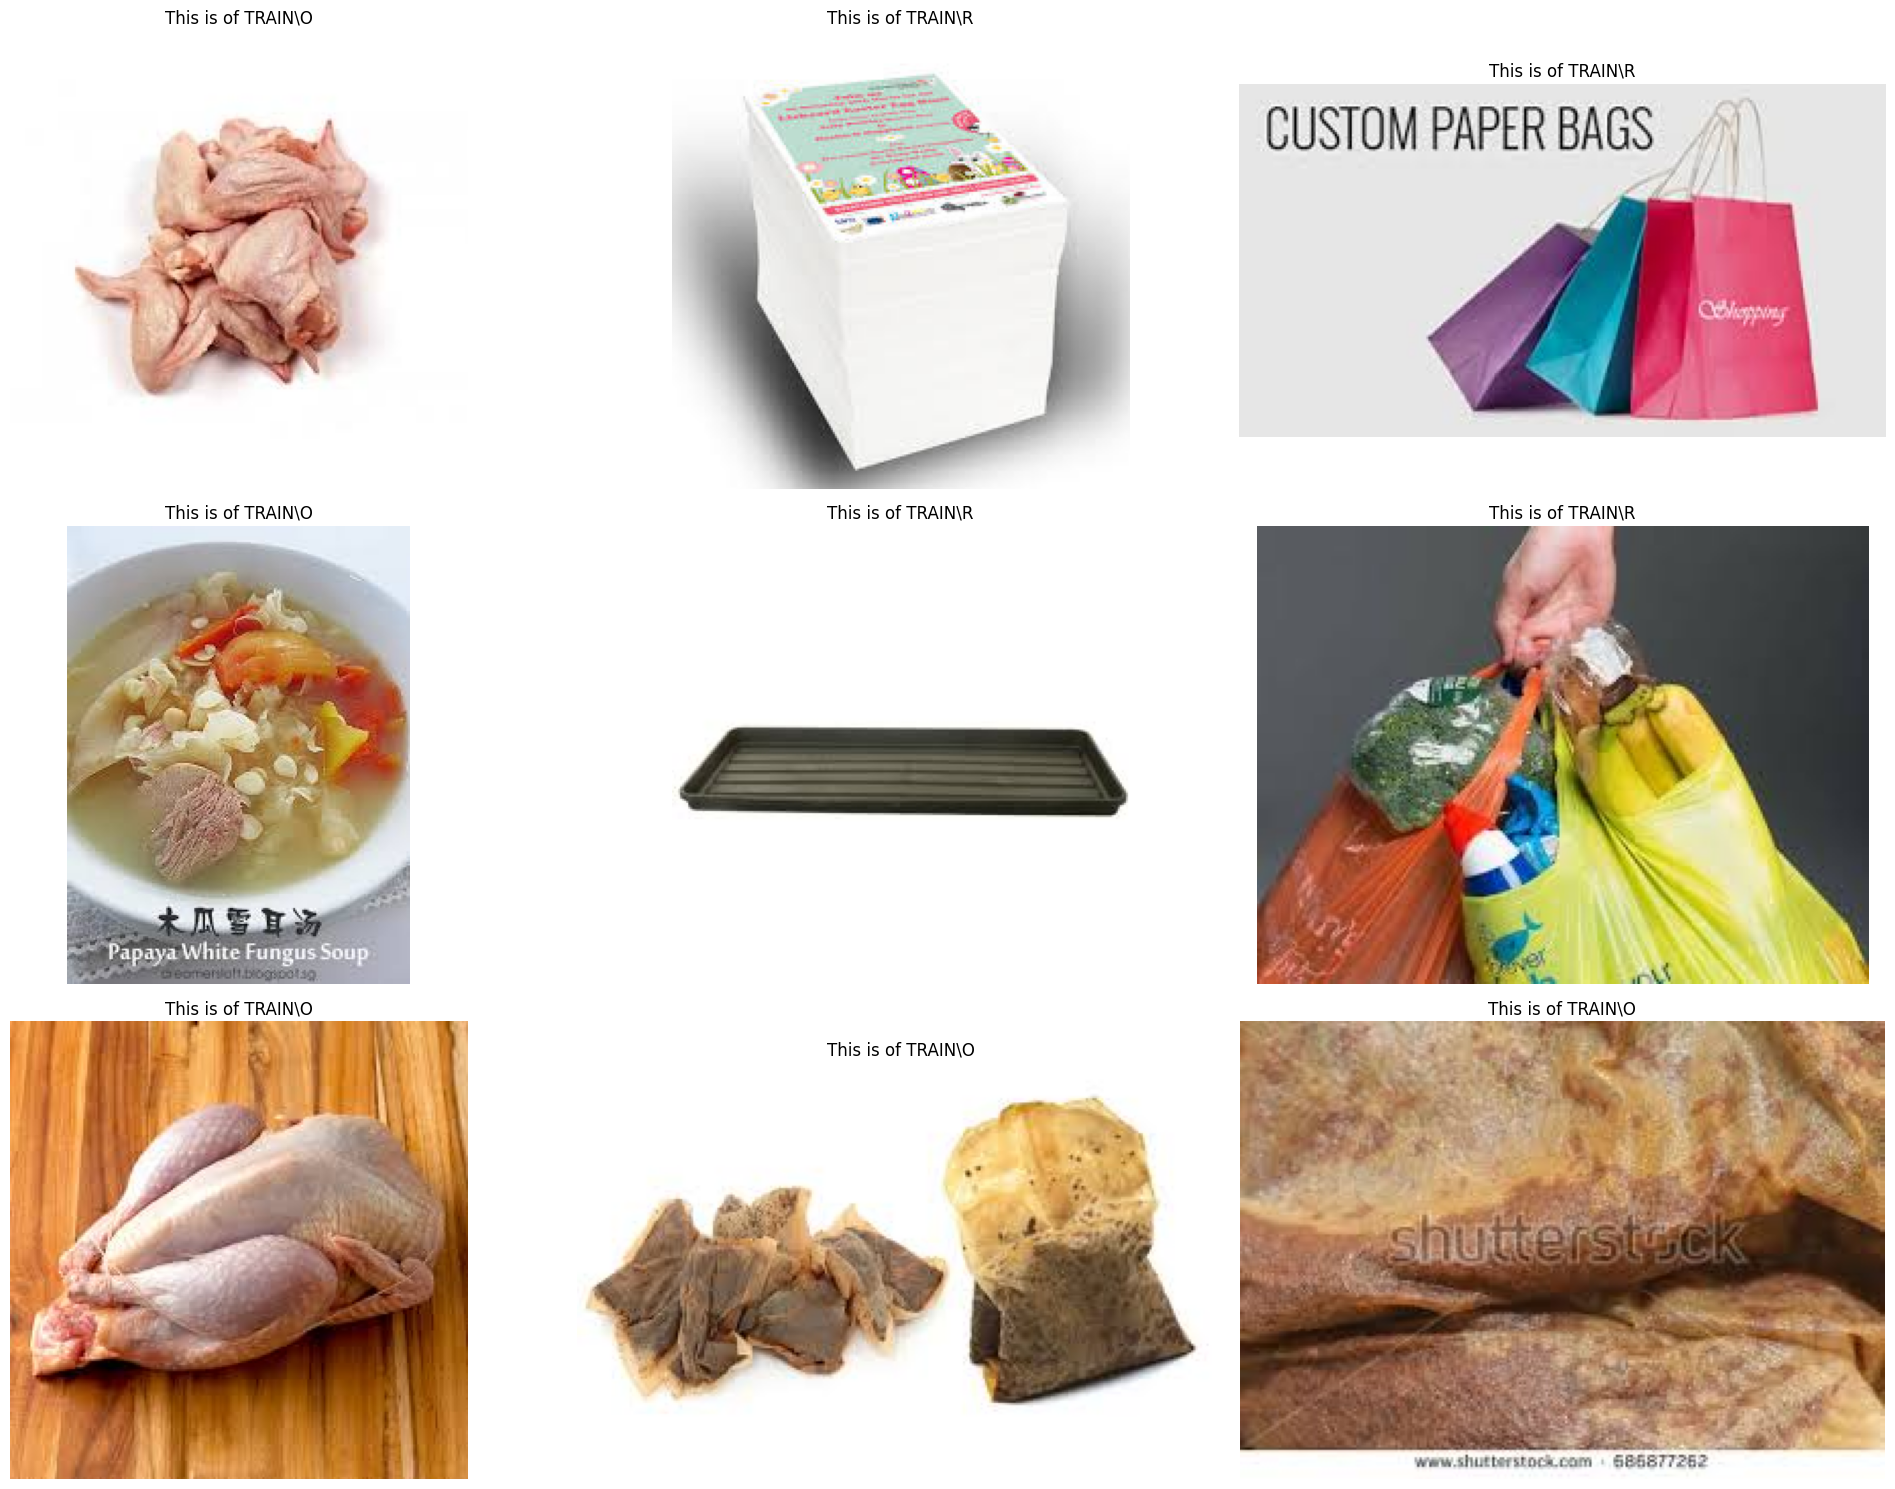

In [46]:
plt.figure(figsize=(20, 15))

for i in range(9):
    plt.subplot(3, 3, i + 1)  # 3x3 grid of subplots
    Index = np.random.randint(len(data))  # Get a valid index
    plt.title(f'This is of {data.label[Index]}')  # Display label
    plt.imshow(data['img'][Index])  # Display image
    plt.axis('off')  # Hide axis for better visualization

plt.tight_layout()  # Adjust layout
plt.show()


In [47]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

In [48]:
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
validation_generator = datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 18052 images belonging to 2 classes.
Found 4512 images belonging to 2 classes.


In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.initializers import HeNormal

def build_model(input_shape=(150, 150, 3), num_classes=2):
    model = Sequential([
        # First Convolutional Block
        Conv2D(32, (3, 3), activation='relu', kernel_initializer=HeNormal(), input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D(2, 2),

        # Second Convolutional Block
        Conv2D(64, (3, 3), activation='relu', kernel_initializer=HeNormal()),
        BatchNormalization(),
        MaxPooling2D(2, 2),

        # Third Convolutional Block
        Conv2D(128, (3, 3), activation='relu', kernel_initializer=HeNormal()),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        
        # Fourth Convolutional Block
        Conv2D(256, (3, 3), activation='relu', kernel_initializer=HeNormal()),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        
        # Fully Connected Layers
        Flatten(),
        Dense(512, activation='relu', kernel_initializer=HeNormal()),
        Dropout(0.5),  # Regularization
        Dense(256, activation='relu', kernel_initializer=HeNormal()),
        Dropout(0.5),  # Regularization
        
        # Output Layer
        Dense(num_classes, activation='softmax')  # Ensure num_classes is defined
    ])

    return model


In [50]:
model = build_model(input_shape=(150, 150, 3), num_classes=len(train_generator.class_indices))

model.compile(
    optimizer='adam',  # You can also try 'rmsprop' for better performance
    loss='categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' if labels are integers
    metrics=['accuracy']
)



In [51]:

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 15, 15, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,945,218 (26.49 MB)

 Trainable params: 6,944,258 (26.49 MB)

 Non-trainable params: 960 (3.75 KB)

In [55]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=2,  # Adjust based on performance
    verbose=1
)


Epoch 1/2
565/565 ━━━━━━━━━━━━━━━━━━━━ 533s 942ms/step - accuracy: 0.8230 - loss: 0.4354 - val_accuracy: 0.7622 - val_loss: 0.4704
Epoch 2/2
565/565 ━━━━━━━━━━━━━━━━━━━━ 577s 1s/step - accuracy: 0.8255 - loss: 0.4360 - val_accuracy: 0.7662 - val_loss: 0.4763


In [58]:
# Save the trained model

model.save("Waste-Classification-CNN-Model.h5")

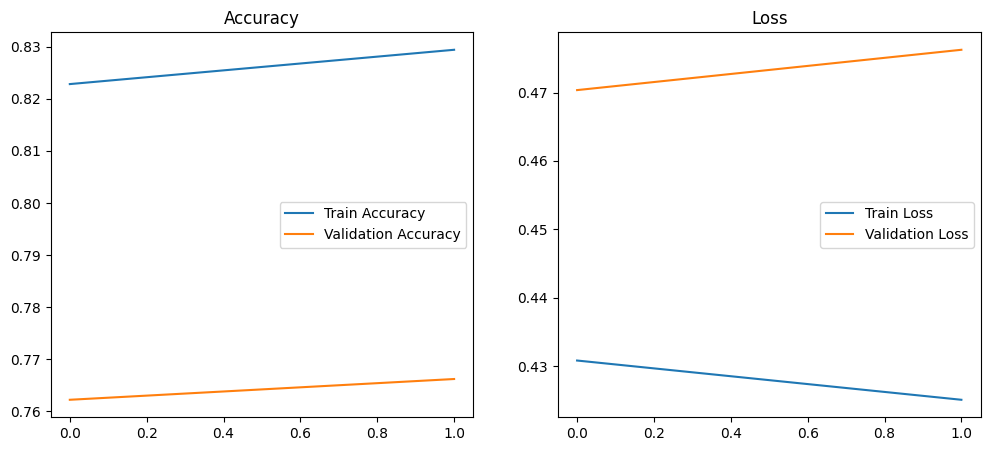

In [60]:
# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()


In [61]:

from tensorflow.keras.models import load_model

# Load the best saved model
model = load_model("Waste-Classification-CNN-Model.h5")

# Display the model architecture again to verify loading
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 15, 15, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,945,220 (26.49 MB)

 Trainable params: 6,944,258 (26.49 MB)

 Non-trainable params: 960 (3.75 KB)

 Optimizer params: 2 (12.00 B)

In [67]:
import os

# Define the paths
train_path = "DATASET/TRAIN"
test_path = "DATASET/TEST"

# Check if the directories exist
if not os.path.exists(test_path):
    raise FileNotFoundError(f"Test directory not found: {test_path}")

# Check contents of the test directory
print("Contents of test directory:", os.listdir(test_path))


Contents of test directory: ['O', 'R']


In [68]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

try:
    test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        shuffle=False
    )
    print("Test data loaded successfully!")
except Exception as e:
    print("Error loading test data:", e)


Found 2513 images belonging to 2 classes.
Test data loaded successfully!


In [69]:
# Evaluate model accuracy on test set
test_loss, test_accuracy = model.evaluate(test_generator)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


79/79 ━━━━━━━━━━━━━━━━━━━━ 25s 317ms/step - accuracy: 0.9154 - loss: 0.2155
Test Accuracy: 79.11%
Test Loss: 0.5026


In [70]:

import numpy as np

# Get predictions (probabilities)
predictions = model.predict(test_generator)

# Convert probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Get actual class labels from test generator
actual_classes = test_generator.classes

# Get class labels (to map indices back to names)
class_labels = list(test_generator.class_indices.keys())

# Print sample predictions
print("Predicted Classes:", [class_labels[i] for i in predicted_classes[:10]])
print("Actual Classes:", [class_labels[i] for i in actual_classes[:10]])


79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step
Predicted Classes: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
Actual Classes: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


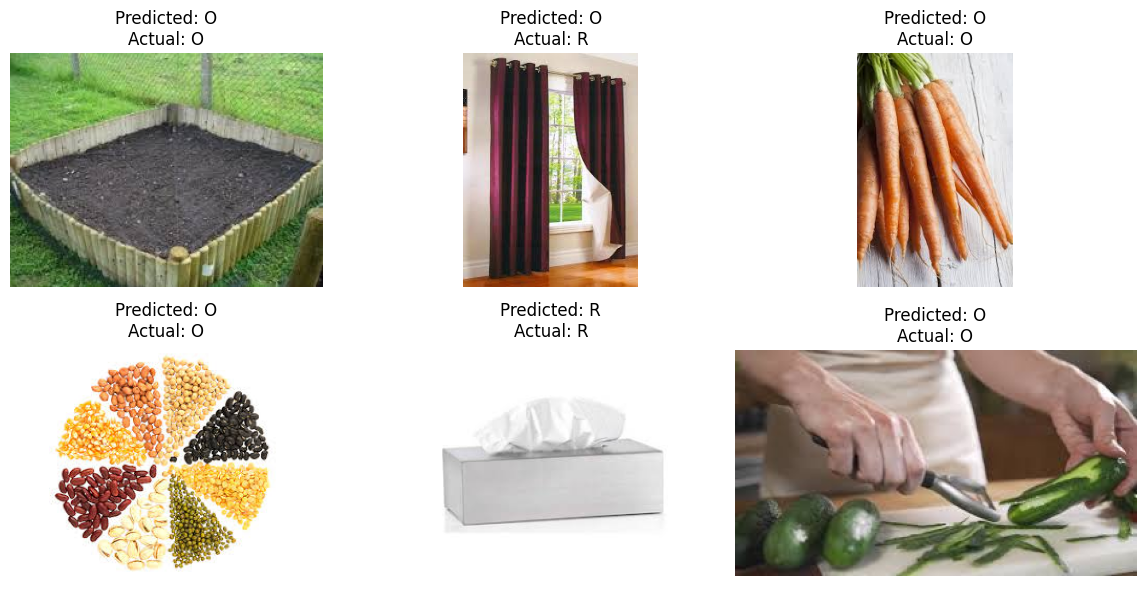

In [71]:
import matplotlib.pyplot as plt

# Get file names for test images
test_image_paths = test_generator.filepaths

# Select random indices
random_indices = np.random.choice(len(test_image_paths), 6, replace=False)

plt.figure(figsize=(12, 6))

for i, idx in enumerate(random_indices):
    img = cv2.imread(test_image_paths[idx])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct color display

    # Get predicted label
    predicted_label = class_labels[predicted_classes[idx]]
    actual_label = class_labels[actual_classes[idx]]

    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_label}\nActual: {actual_label}", fontsize=12)

plt.tight_layout()
plt.show()

Classification Report:

              precision    recall  f1-score   support

           O       0.75      0.94      0.83      1401
           R       0.89      0.60      0.72      1112

    accuracy                           0.79      2513
   macro avg       0.82      0.77      0.78      2513
weighted avg       0.81      0.79      0.78      2513



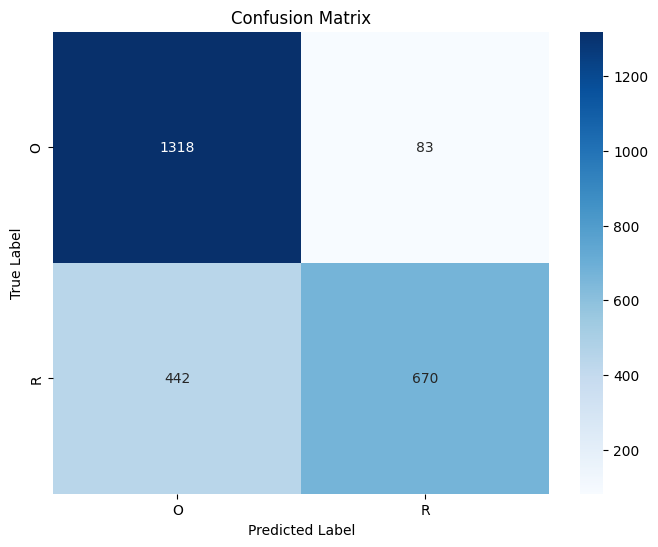

In [75]:
# Generate Classification Report and Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix

# Print classification report
print("Classification Report:\n")
print(classification_report(actual_classes, predicted_classes, target_names=class_labels))

# Generate and plot confusion matrix
import seaborn as sns

cm = confusion_matrix(actual_classes, predicted_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
